# Decision Tree Regression Task

##### 기온 및 강수량 별 모기 비율 예측

- date: 년-월-일
- mosquito_Indicator: 모기 비율
- rain(mm): 일 강수량
- mean_T(℃): 일 평균 기온
- min_T(℃): 일 최저 기온
- max_T(℃): 일 최고 기온

In [1]:
import pandas as pd

m_df = pd.read_csv('./datasets/korea_mosquito.csv')
m_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [2]:
m_df.isna().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

In [3]:
m_df.duplicated().sum()

47

In [4]:
pre_m_df = m_df.drop_duplicates()
pre_m_df.duplicated().sum()

0

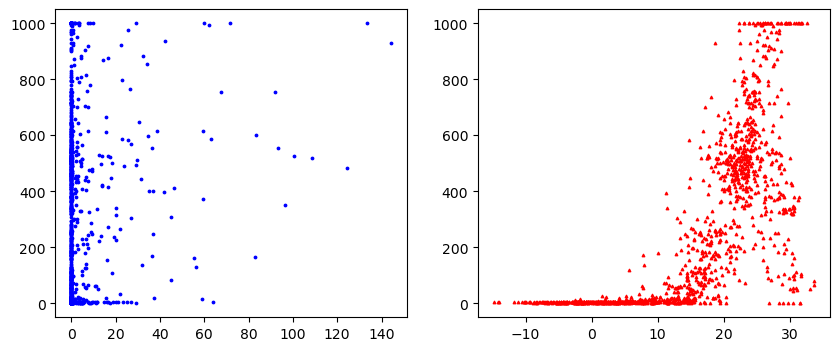

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x='rain(mm)', y='mosquito_Indicator', data=pre_m_df, c='blue', s=3)
ax[1].scatter(x='mean_T(℃)', y='mosquito_Indicator', data=pre_m_df, c='red', marker='^', s=3)
plt.show()

In [7]:
pre_m_df = pre_m_df.drop(labels=['date'], axis=1)
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...
1337,5.5,0.0,-1.7,-4.6,2.6
1338,5.5,0.0,1.1,-3.6,6.1
1339,5.5,1.4,3.8,1.1,6.2
1340,5.5,0.4,2.7,-5.7,6.8


In [8]:
pre_m_df = pre_m_df.reset_index(drop=True)
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...
1290,5.5,0.0,-1.7,-4.6,2.6
1291,5.5,0.0,1.1,-3.6,6.1
1292,5.5,1.4,3.8,1.1,6.2
1293,5.5,0.4,2.7,-5.7,6.8


In [9]:
pre_m_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mosquito_Indicator,1295.0,248.978069,294.867810,0.0,5.50,87.7,478.05,1000.0
rain(mm),1295.0,3.234903,12.302861,0.0,0.00,0.0,0.40,144.5
mean_T(℃),1295.0,14.137915,10.941415,-14.8,4.55,16.4,23.30,33.7
min_T(℃),1295.0,9.975367,11.100456,-17.8,0.30,11.3,19.50,30.3
max_T(℃),1295.0,19.078456,11.068348,-10.7,9.50,21.9,28.20,39.6


In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_m_df)
std_pre_m_df = pd.DataFrame(result, columns=pre_m_df.columns)
std_pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,0.018395,-0.263041,0.426260,0.200487,0.625587
1,0.083195,1.078629,0.636552,0.588008,0.842506
2,0.186671,1.932419,-0.113184,-0.096913,-0.133627
3,0.024502,-0.263041,0.142823,0.020244,0.137521
4,-0.017567,0.346809,0.435403,0.020244,0.706932
...,...,...,...,...,...
1290,-0.826038,-0.263041,-1.448079,-1.313549,-1.489366
1291,-0.826038,-0.263041,-1.192072,-1.223428,-1.173027
1292,-0.826038,-0.149202,-0.945208,-0.799859,-1.163989
1293,-0.826038,-0.230515,-1.045782,-1.412683,-1.109759


In [11]:
condition = True

for column in std_pre_m_df.columns:
    condition &= std_pre_m_df[column].between(-1.96, 1.96)

std_pre_m_df = std_pre_m_df[condition]
std_pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,0.018395,-0.263041,0.426260,0.200487,0.625587
1,0.083195,1.078629,0.636552,0.588008,0.842506
2,0.186671,1.932419,-0.113184,-0.096913,-0.133627
3,0.024502,-0.263041,0.142823,0.020244,0.137521
4,-0.017567,0.346809,0.435403,0.020244,0.706932
...,...,...,...,...,...
1289,-0.826038,-0.238647,-1.109784,-1.115283,-1.353792
1290,-0.826038,-0.263041,-1.448079,-1.313549,-1.489366
1291,-0.826038,-0.263041,-1.192072,-1.223428,-1.173027
1292,-0.826038,-0.149202,-0.945208,-0.799859,-1.163989


In [14]:
pre_m_df = pre_m_df.iloc[std_pre_m_df.index].reset_index(drop=True)
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...
1156,5.5,0.3,2.0,-2.4,4.1
1157,5.5,0.0,-1.7,-4.6,2.6
1158,5.5,0.0,1.1,-3.6,6.1
1159,5.5,1.4,3.8,1.1,6.2


array([[<Axes: title={'center': 'mosquito_Indicator'}>,
        <Axes: title={'center': 'rain(mm)'}>],
       [<Axes: title={'center': 'mean_T(℃)'}>,
        <Axes: title={'center': 'min_T(℃)'}>],
       [<Axes: title={'center': 'max_T(℃)'}>, <Axes: >]], dtype=object)

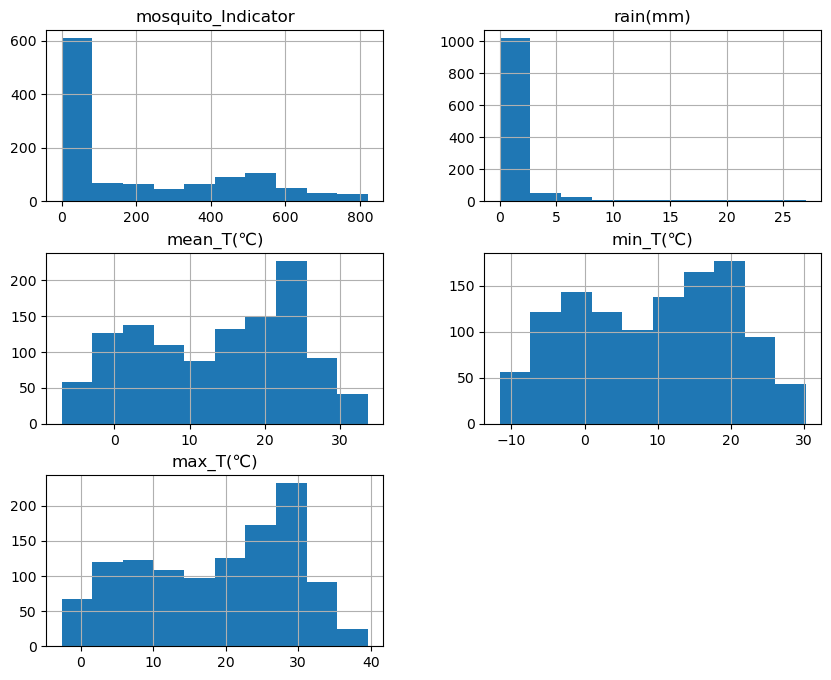

In [15]:
pre_m_df.hist(figsize=(10, 8))

In [17]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, 1:], pre_m_df.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              789.1
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:16:22   Log-Likelihood:                         -7572.2
No. Observations:                1161   AIC:                                  1.515e+04
Df Residuals:                    1157   BIC:                                  1.517e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [19]:
get_vif(features)

,vif_score,feature
0,1.099743,rain(mm)
1,912.465754,mean_T(℃)
2,173.593618,min_T(℃)
3,325.616182,max_T(℃)


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, 1:], pre_m_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)

LinearRegression()

In [27]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 27023.1663, RMSE: 164.3872, R2: 0.5809


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
pre_m_df = pre_m_df.iloc[:, 0:3]
pre_m_df

,mosquito_Indicator,rain(mm),mean_T(℃)
0,254.4,0.0,18.8
1,273.5,16.5,21.1
2,304.0,27.0,12.9
3,256.2,0.0,15.7
4,243.8,7.5,18.9
...,...,...,...
1156,5.5,0.3,2.0
1157,5.5,0.0,-1.7
1158,5.5,0.0,1.1
1159,5.5,1.4,3.8


In [31]:
features, targets = pre_m_df.iloc[:, 1:], pre_m_df.iloc[:, 0]

get_vif(features)

,vif_score,feature
0,1.097119,rain(mm)
1,1.097119,mean_T(℃)


In [32]:
from statsmodels.api import OLS

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:     mosquito_Indicator   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              1519.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:20:46   Log-Likelihood:                         -7589.0
No. Observations:                1161   AIC:                                  1.518e+04
Df Residuals:                    1159   BIC:                                  1.519e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, 1:], pre_m_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [39]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 27287.0552, RMSE: 165.1879, R2: 0.5768


<Axes: >

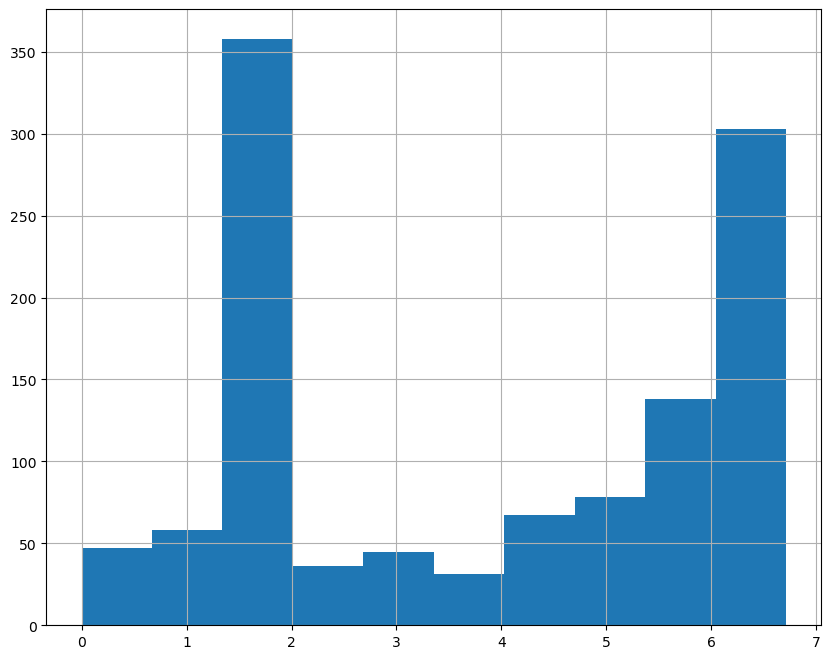

In [41]:
import numpy as np
pre_m_df['mosquito_Indicator'].hist(figsize=(10, 8))

In [42]:
from sklearn.preprocessing import PowerTransformer
ptf = PowerTransformer(standardize=False)
pre_m_df['Target_yeo'] = ptf.fit_transform(pre_m_df[['mosquito_Indicator']])
pre_m_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_13412\3359224454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_m_df['Target_yeo'] = ptf.fit_transform(pre_m_df[['mosquito_Indicator']])


,mosquito_Indicator,rain(mm),mean_T(℃),Target_yeo
0,254.4,0.0,18.8,6.033458
1,273.5,16.5,21.1,6.118805
2,304.0,27.0,12.9,6.243823
3,256.2,0.0,15.7,6.041761
4,243.8,7.5,18.9,5.983382
...,...,...,...,...
1156,5.5,0.3,2.0,1.925687
1157,5.5,0.0,-1.7,1.925687
1158,5.5,0.0,1.1,1.925687
1159,5.5,1.4,3.8,1.925687


array([[<Axes: title={'center': 'mosquito_Indicator'}>,
        <Axes: title={'center': 'rain(mm)'}>],
       [<Axes: title={'center': 'mean_T(℃)'}>,
        <Axes: title={'center': 'Target_yeo'}>]], dtype=object)

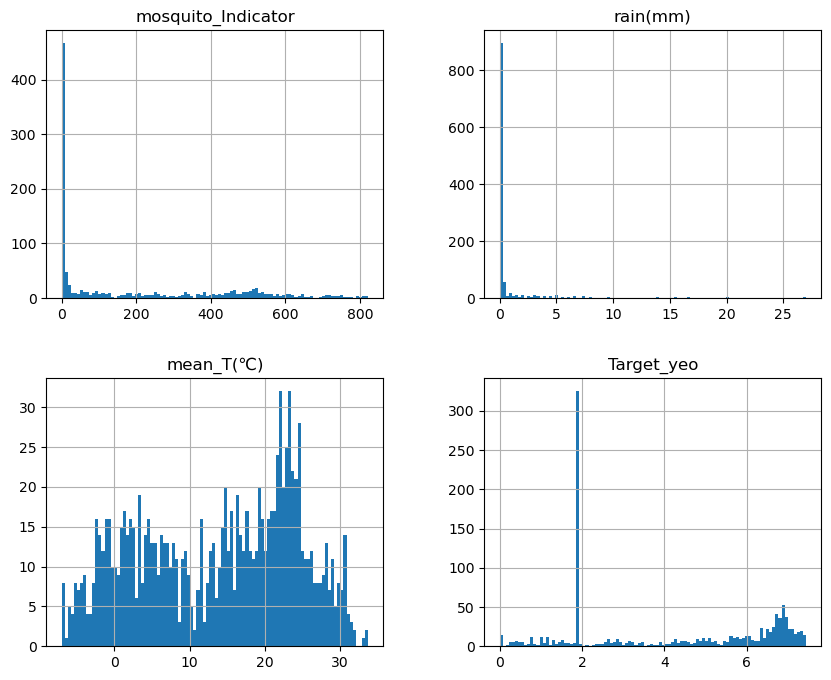

In [43]:
pre_m_df.hist(figsize=(10, 8), bins=100)

In [45]:
pre_m_df.drop(labels=['mosquito_Indicator'], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13412\3005297374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_m_df.drop(labels=['mosquito_Indicator'], axis=1, inplace=True)


In [47]:
pre_m_df

,rain(mm),mean_T(℃),Target_yeo
0,0.0,18.8,6.033458
1,16.5,21.1,6.118805
2,27.0,12.9,6.243823
3,0.0,15.7,6.041761
4,7.5,18.9,5.983382
...,...,...,...
1156,0.3,2.0,1.925687
1157,0.0,-1.7,1.925687
1158,0.0,1.1,1.925687
1159,1.4,3.8,1.925687


In [46]:
from statsmodels.api import OLS

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              4545.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:28:22   Log-Likelihood:                         -2198.5
No. Observations:                1161   AIC:                                      4401.
Df Residuals:                    1159   BIC:                                      4411.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [49]:
get_vif(features)

,vif_score,feature
0,1.097119,rain(mm)
1,1.097119,mean_T(℃)


In [50]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [53]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.6322, RMSE: 1.2776, R2: 0.7186


In [75]:
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=0)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [76]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))

In [77]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.8798, RMSE: 0.9380, MSLE: 0.0676, RMSLE: 0.2600, R2: 0.8320


In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=0)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 1.7566, RMSE: 1.3254, MSLE: 0.1139, RMSLE: 0.3375, R2: 0.6647
RandomForestRegressor
MSE: 1.2382, RMSE: 1.1128, MSLE: 0.0872, RMSLE: 0.2953, R2: 0.7636
GradientBoostingRegressor
MSE: 0.9702, RMSE: 0.9850, MSLE: 0.0731, RMSLE: 0.2703, R2: 0.8148
XGBRegressor
MSE: 1.3378, RMSE: 1.1566, MSLE: 0.0914, RMSLE: 0.3023, R2: 0.7446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 928, number of used features: 2
[LightGBM] [Info] Start training from score 4.142703
LGBMRegressor
MSE: 0.9918, RMSE: 0.9959, MSLE: 0.0749, RMSLE: 0.2736, R2: 0.8107
